In [1]:
%cd /home/ducpham/Documents/LightRAG
# move to project

/home/ducpham/Documents/LightRAG


In [2]:
# init global config for classes 

from config import ConfigParams
from dataclasses import asdict

config = asdict(ConfigParams())
for k, v in config.items():
    print(f"Key: {k}  -> Value: {v}")

Key: log_level  -> Value: 0
Key: storage_classes  -> Value: {'JsonKVStorage': <class 'lightrag.kvstore.json_kv.JsonKVStorage'>, 'NanoVectorDBStorage': <class 'lightrag.vectorstore.nano.NanoVectorStorage'>, 'NetworkXStorage': <class 'lightrag.graphstore.networkx.NetworkXStorage'>}
Key: working_dir  -> Value: ./lightrag_cache_2024-12-19-00:26:05
Key: chunk_token_size  -> Value: 1200
Key: chunk_overlap_token_size  -> Value: 200
Key: tiktoken_model_name  -> Value: gpt-4o-mini
Key: entity_extract_max_gleaning  -> Value: 1
Key: entity_summary_to_max_token  -> Value: 500
Key: node_embedding_algorithm  -> Value: node2vec
Key: node2vec_params  -> Value: {'dimentions': 1536, 'num_walks': 10, 'walk_length': 10, 'windown_size': 2, 'iterations': 3, 'random_seed': 3}
Key: embedding_func  -> Value: {'embedding_dim': 1536, 'max_token': 8192, 'func': <function openai_embedding at 0x7191b59c8860>, 'concurrent_limit': 16}
Key: embedding_batch_num  -> Value: 32
Key: embedding_func_max_async  -> Value: 16


### 1. NetworKX Demo

In [3]:
from lightrag.graphstore import NetworkXStorage
import networkx as nx

#### 1.1 Init Network

In [4]:
chunk_entity_relation_graph = NetworkXStorage(
    namespace="Test_LightRAG",
    global_config=config
)

#### 1.2 upsert some data

In [5]:
await chunk_entity_relation_graph.upsert_node(
    node_id="Eren",
    node_data={
        "entity_type": "person",
        "entity_desc": "Eren là bạn của Armin và Mikasa, cậu luôn có ước mơ được tự do",
        "entity_source_id": "1"
    }
)

In [6]:
await chunk_entity_relation_graph.upsert_node(
    node_id="Mikasa",
    node_data={
        "entity_type": "person",
        "entity_desc": "Mikasa là bạn của Eren và Armin, cậu được nhận nuôi bời gia đình của Eren",
        "entity_source_id": "1"
    }
)

In [7]:
await chunk_entity_relation_graph.upsert_node(
    node_id="Armin",
    node_data={
        "entity_type": "person",
        "entity_desc": "Armin là bạn của Eren và Mikasa, cậu là người tuy nhút nhát nhưng lại rất thông minh",
        "entity_source_id": "1"
    }
)

In [8]:
await chunk_entity_relation_graph.upsert_edge(
    src_node_id="Eren",
    tgt_node_id="Mikasa",
    edge_data={
        "edge_desc": "Eren là bạn của Mikasa",
        "edge_keyword": "friend",
        "edge_weight": "10",
        "edge_source_id": "1"
    }
)


In [9]:
await chunk_entity_relation_graph.upsert_edge(
    src_node_id="Eren",
    tgt_node_id="Armin",
    edge_data={
        "edge_desc": "Eren là bạn của Armin",
        "edge_keyword": "friend",
        "edge_weight": "9",
        "edge_source_id": "1"
    }
)


In [10]:
await chunk_entity_relation_graph.upsert_edge(
    src_node_id="Armin",
    tgt_node_id="Mikasa",
    edge_data={
        "edge_desc": "Armin là bạn của Mikasa",
        "edge_keyword": "friend",
        "edge_weight": "9",
        "edge_source_id": "1"
    }
)


In [17]:
chunk_entity_relation_graph.write_nx_graph(file_name="./testing/data/aot.graphml", G=chunk_entity_relation_graph._graph)


INFO:lightrag:Writing graph with 3 nodes, 3 edges


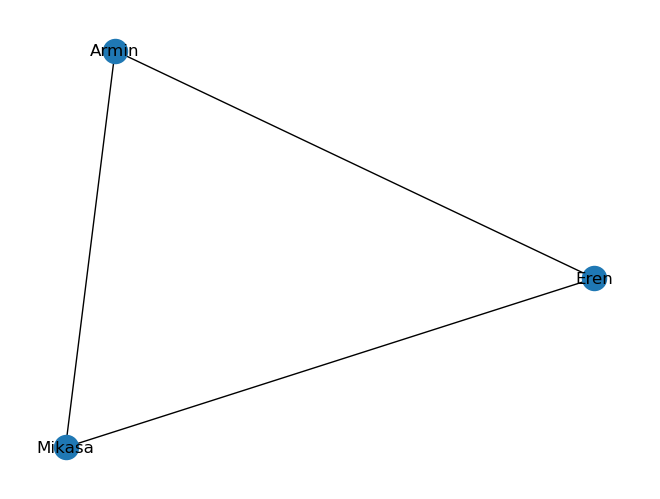

In [20]:
nx.draw(G=chunk_entity_relation_graph.load_nx_graph(file_name="./testing/data/aot.graphml"),
        with_labels = True)

#### 1.3 Get data

In [11]:
await chunk_entity_relation_graph.get_node(node_id="Eren")

{'entity_type': 'person',
 'entity_desc': 'Eren là bạn của Armin và Mikasa, cậu luôn có ước mơ được tự do',
 'entity_source_id': '1'}

In [12]:
await chunk_entity_relation_graph.get_all_node()

NodeView(('Eren', 'Mikasa', 'Armin'))

In [13]:
await chunk_entity_relation_graph.get_edge(src_node_id="Eren", tgt_node_id="Mikasa")

/home/ducpham/Documents/LightRAG/lightrag/graphstore/networkx.py:65: RuntimeWarning: coroutine 'NetworkXStorage.has_edge' was never awaited
  if self.has_edge(src_node_id, tgt_node_id):


{'edge_desc': 'Eren là bạn của Mikasa',
 'edge_keyword': 'friend',
 'edge_weight': '10',
 'edge_source_id': '1'}

In [14]:
await chunk_entity_relation_graph.get_all_edges()

EdgeView([('Eren', 'Mikasa'), ('Eren', 'Armin'), ('Mikasa', 'Armin')])